In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("/Users/MacbookPro/LocalStorage/Developer/ShellAi/dataset/train.csv")
df.head()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


In [7]:
df.columns

Index(['Component1_fraction', 'Component2_fraction', 'Component3_fraction',
       'Component4_fraction', 'Component5_fraction', 'Component1_Property1',
       'Component2_Property1', 'Component3_Property1', 'Component4_Property1',
       'Component5_Property1', 'Component1_Property2', 'Component2_Property2',
       'Component3_Property2', 'Component4_Property2', 'Component5_Property2',
       'Component1_Property3', 'Component2_Property3', 'Component3_Property3',
       'Component4_Property3', 'Component5_Property3', 'Component1_Property4',
       'Component2_Property4', 'Component3_Property4', 'Component4_Property4',
       'Component5_Property4', 'Component1_Property5', 'Component2_Property5',
       'Component3_Property5', 'Component4_Property5', 'Component5_Property5',
       'Component1_Property6', 'Component2_Property6', 'Component3_Property6',
       'Component4_Property6', 'Component5_Property6', 'Component1_Property7',
       'Component2_Property7', 'Component3_Property7', 'C

# Visualizing Correlations
Let's plot the correlation matrix to understand relationships between columns.

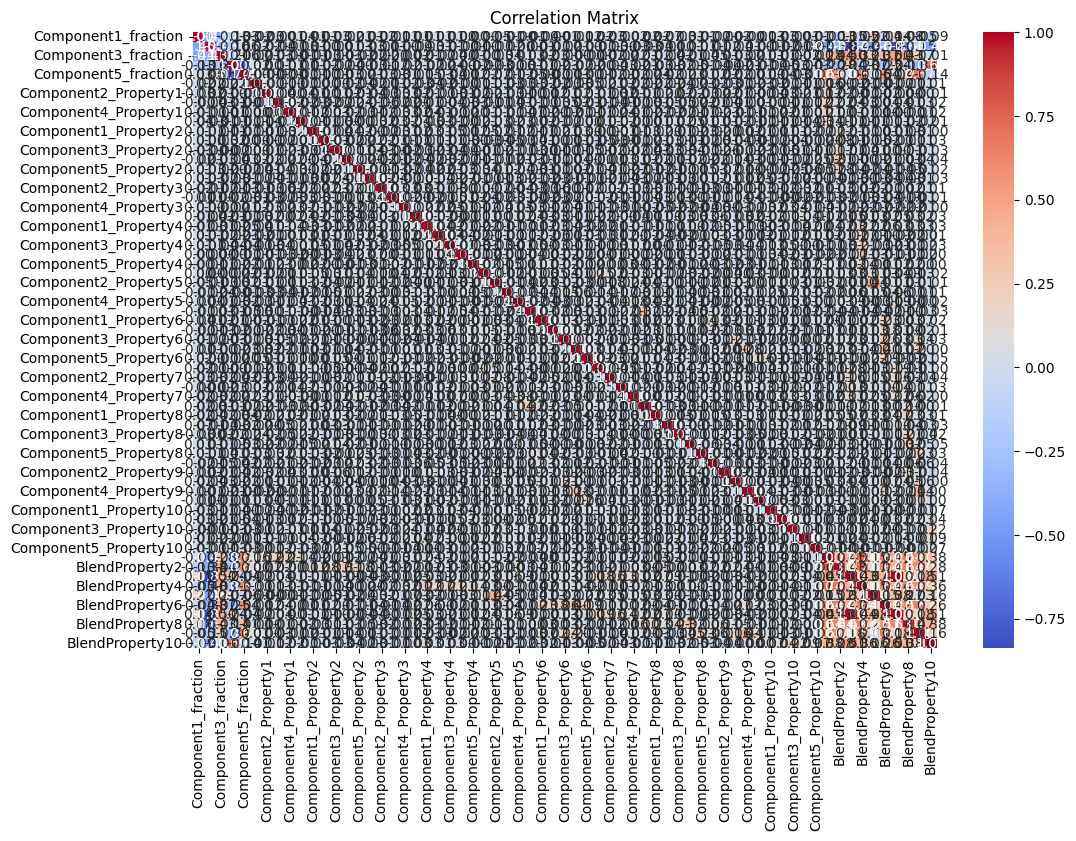

In [8]:
import seaborn as sns
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Model Selection Visualizations

Let's create a comprehensive set of visualizations to help with model selection and understanding our data better.

Found 10 target variables: ['BlendProperty1', 'BlendProperty2', 'BlendProperty3', 'BlendProperty4', 'BlendProperty5', 'BlendProperty6', 'BlendProperty7', 'BlendProperty8', 'BlendProperty9', 'BlendProperty10']


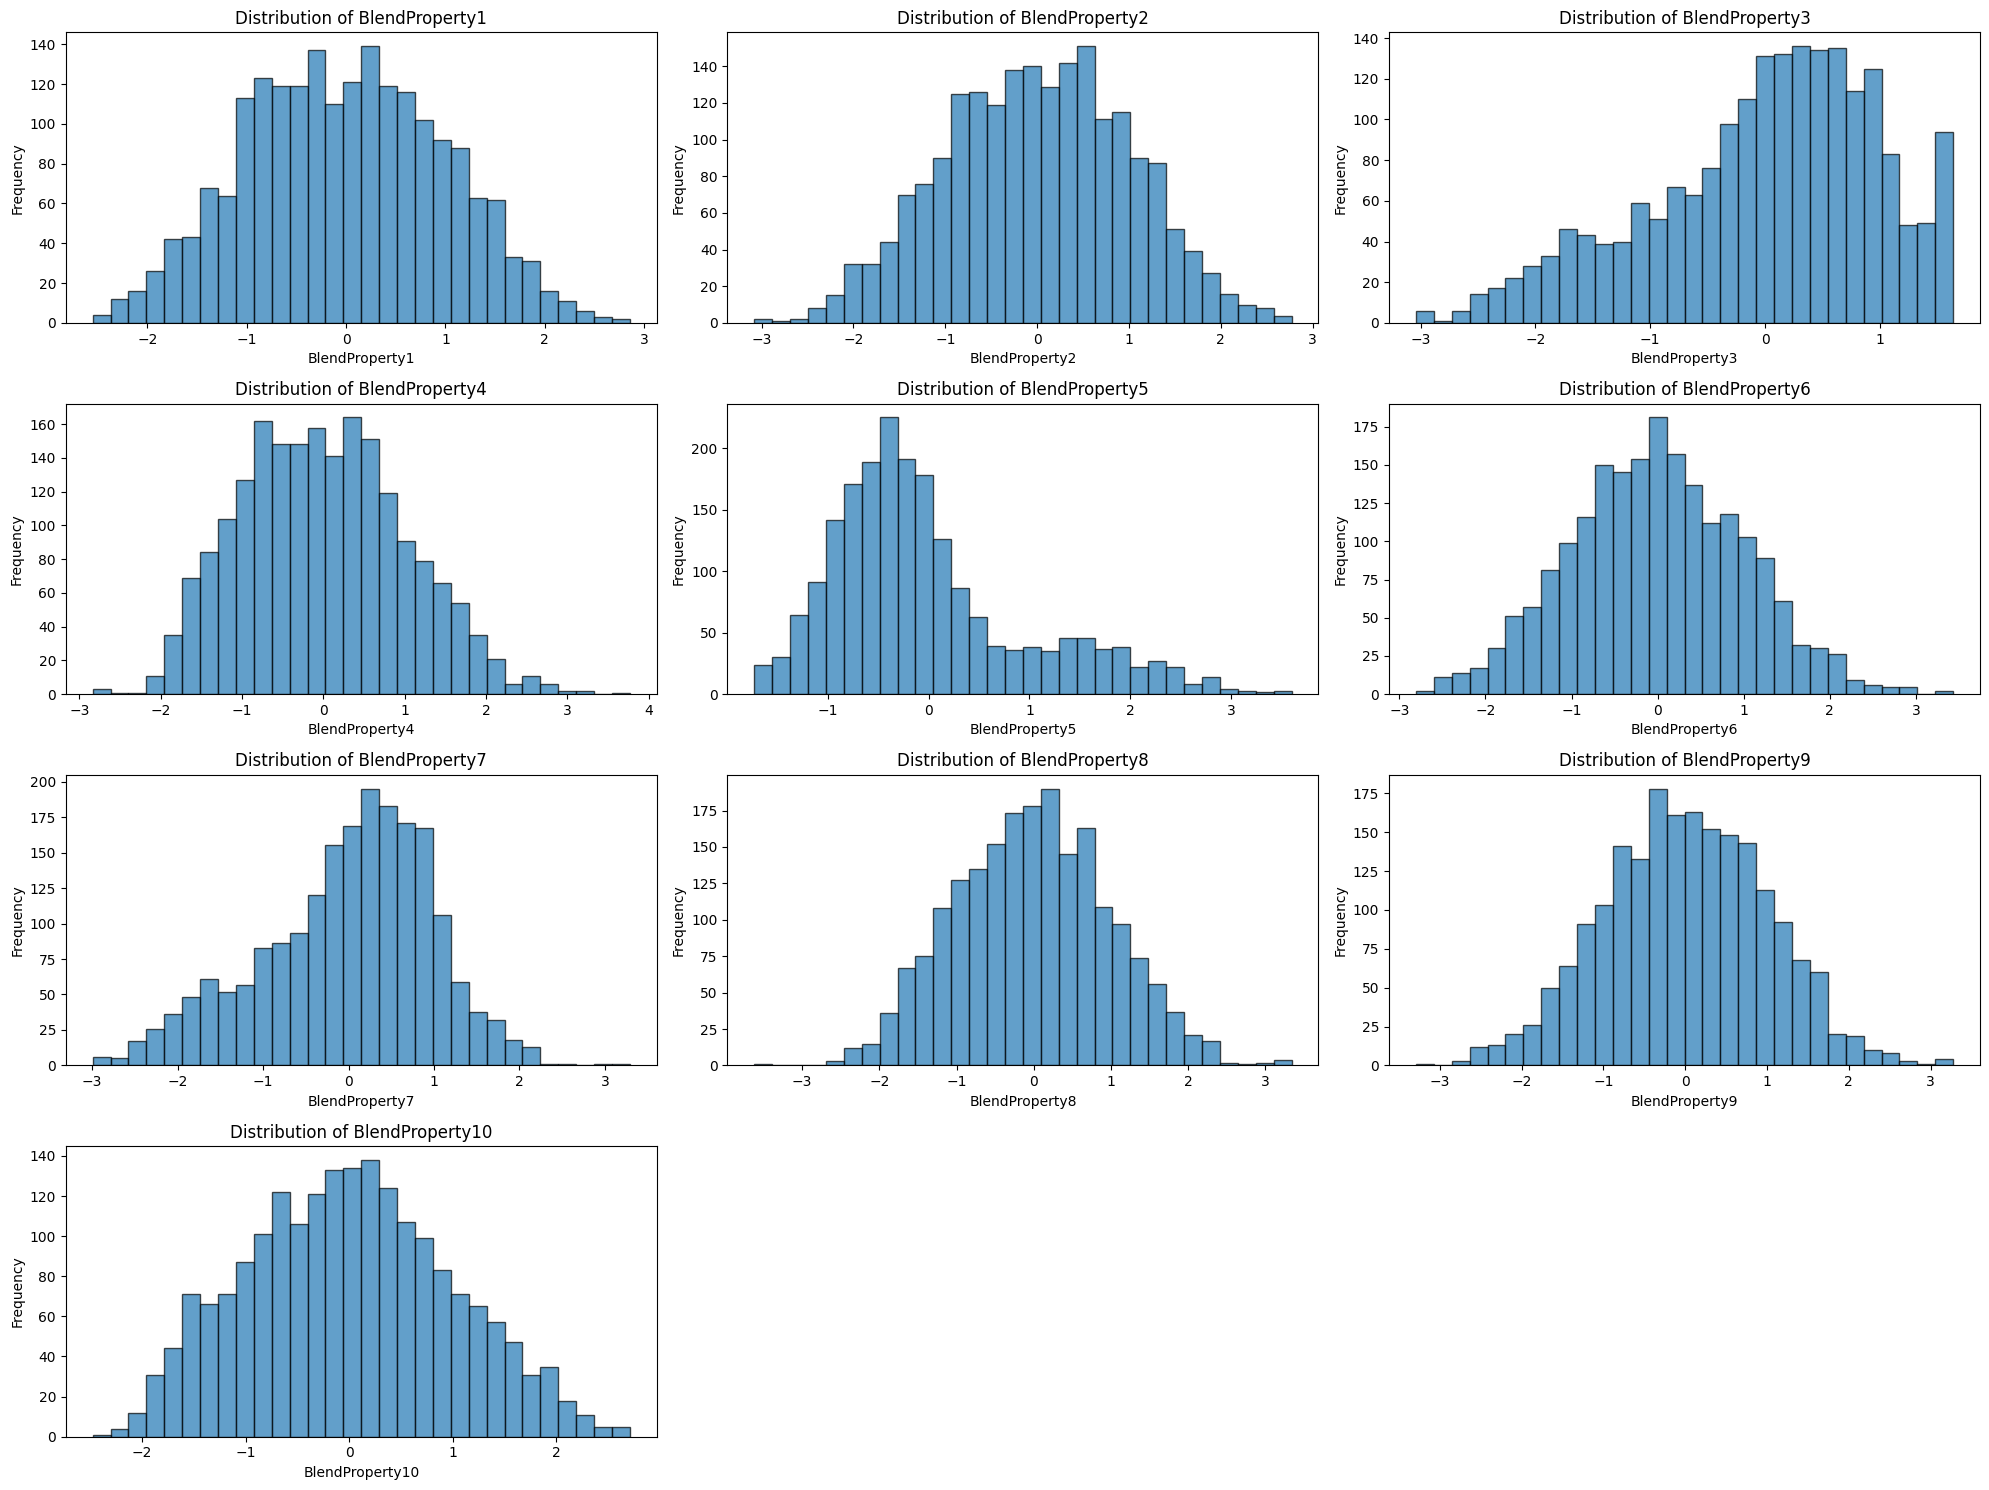

In [10]:
# 1. Data Distribution Analysis
plt.figure(figsize=(20, 15))

# Get target variables (BlendProperty columns)
target_cols = [col for col in df.columns if 'BlendProperty' in col]
print(f"Found {len(target_cols)} target variables: {target_cols}")

# Calculate subplot dimensions
n_cols = 3
n_rows = (len(target_cols) + n_cols - 1) // n_cols

# Plot distribution of target variables
for i, col in enumerate(target_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
# 2. Missing Values Analysis
plt.figure(figsize=(12, 8))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
    plt.subplot(2, 1, 1)
    missing_data.plot(kind='bar')
    plt.title('Missing Values Count by Column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Count')
    
    plt.subplot(2, 1, 2)
    missing_percentage = (missing_data / len(df)) * 100
    missing_percentage.plot(kind='bar', color='orange')
    plt.title('Missing Values Percentage by Column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")
    
# Display missing values summary
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Percentage of complete rows: {(len(df) - df.isnull().any(axis=1).sum()) / len(df) * 100:.2f}%")

No missing values found in the dataset!
Total missing values: 0
Percentage of complete rows: 100.00%


<Figure size 1200x800 with 0 Axes>

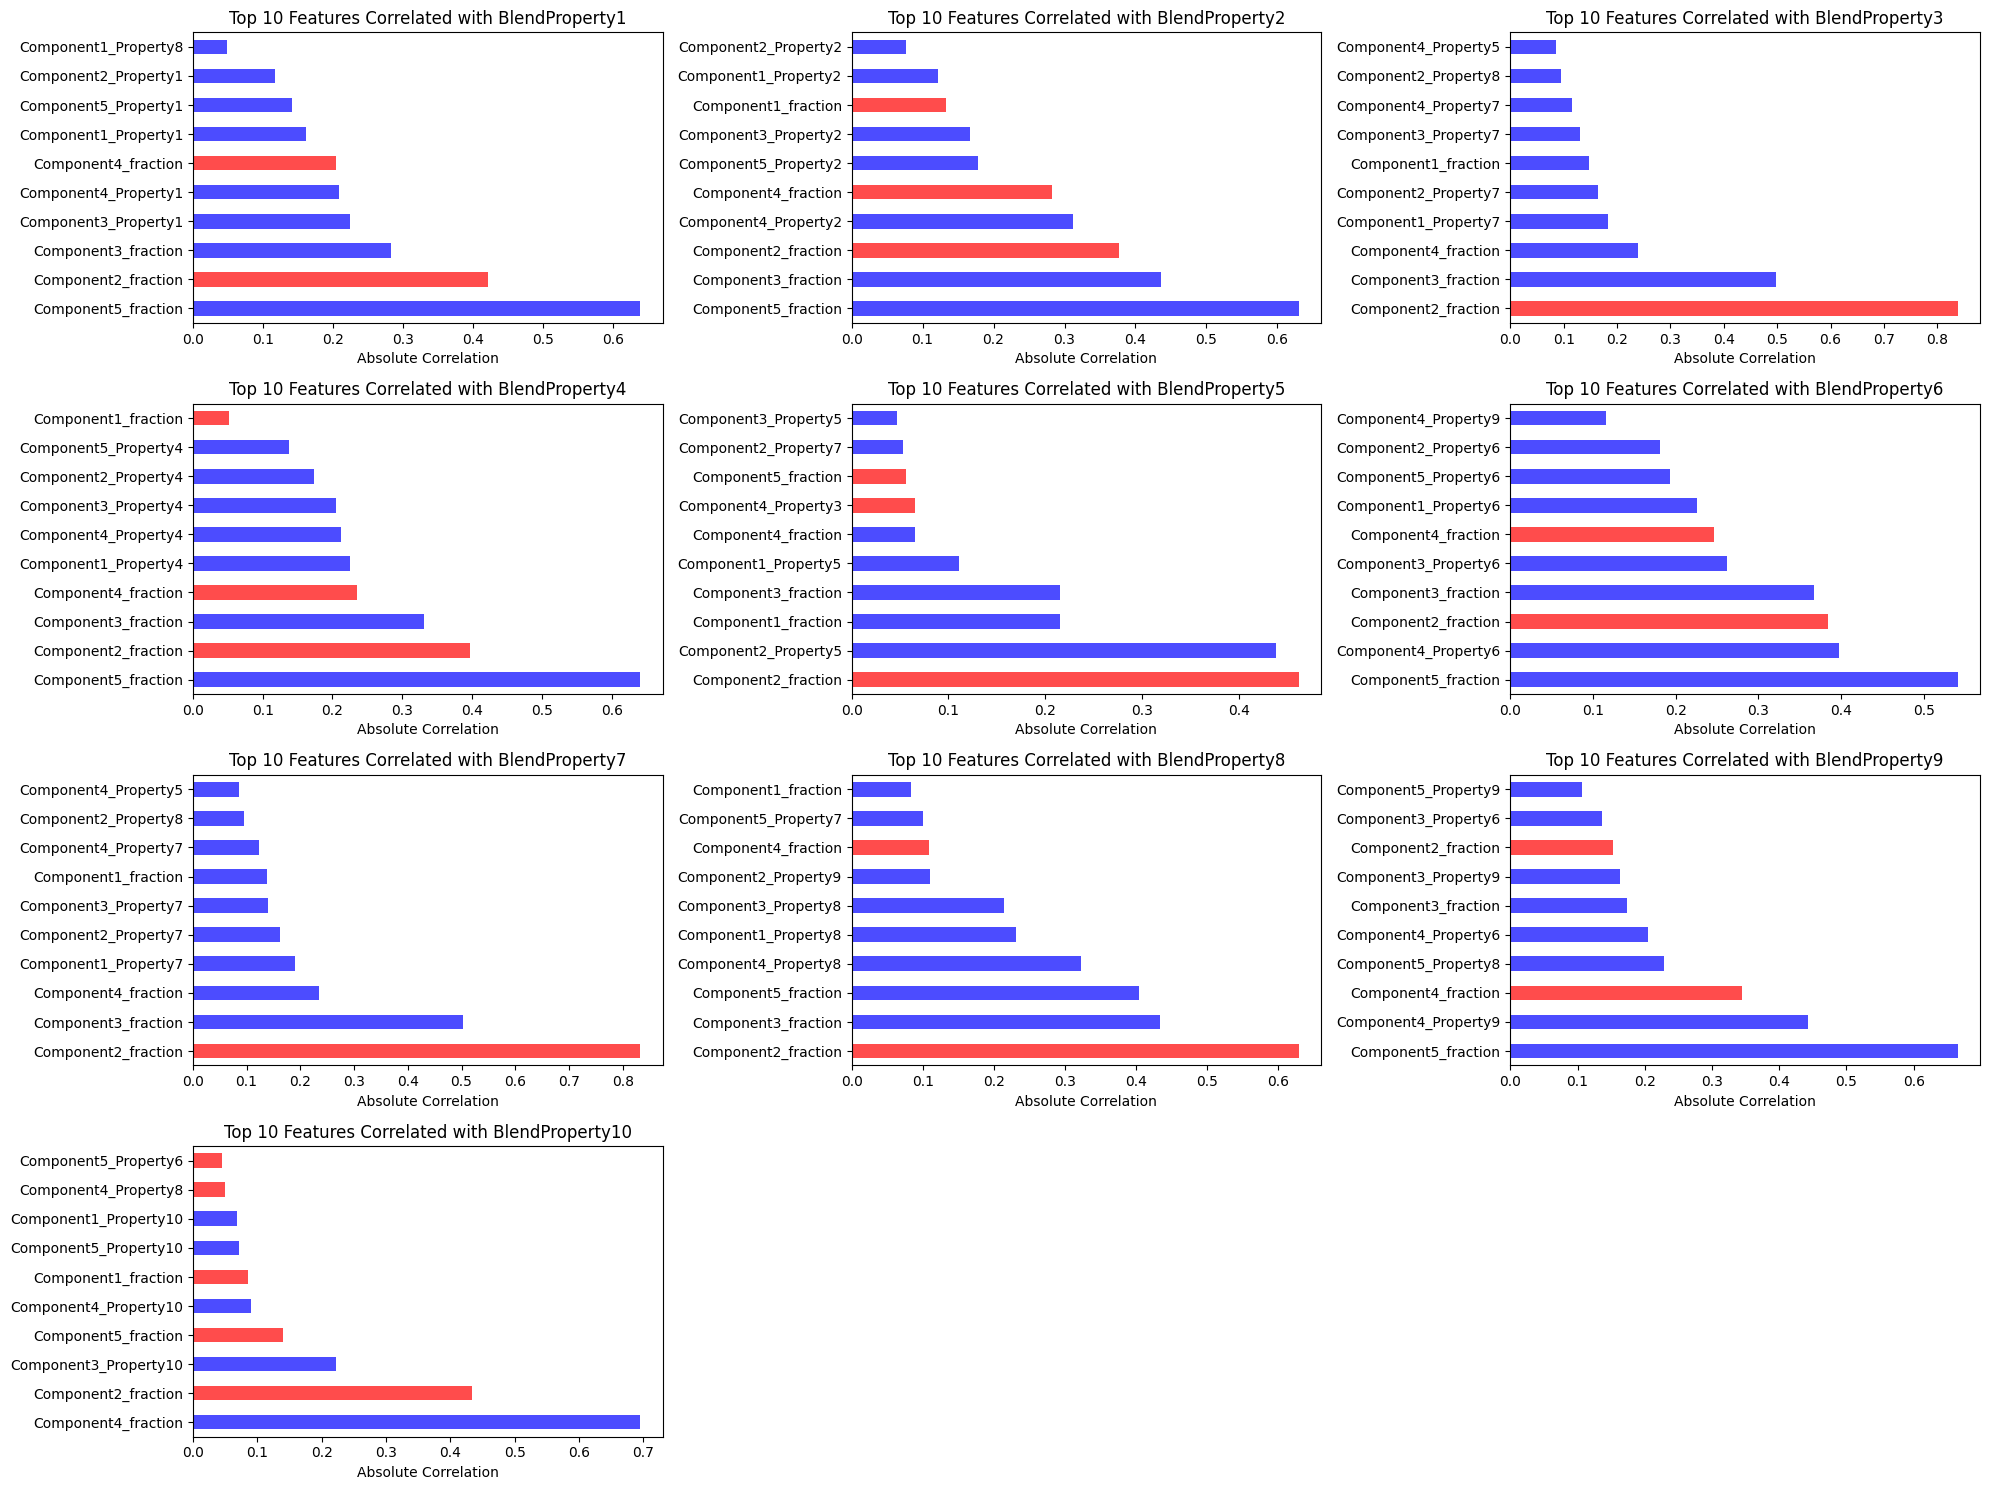

In [12]:
# 3. Feature Correlation with Target Variables
plt.figure(figsize=(20, 15))

# Get feature columns (excluding BlendProperty columns)
feature_cols = [col for col in df.columns if 'BlendProperty' not in col]

# Calculate subplot dimensions
n_cols = 3
n_rows = (len(target_cols) + n_cols - 1) // n_cols

# For each target variable, show correlation with top features
for i, target in enumerate(target_cols):
    plt.subplot(n_rows, n_cols, i+1)
    
    # Calculate correlations with target
    target_corr = df[feature_cols + [target]].corr()[target].drop(target)
    top_corr = target_corr.abs().sort_values(ascending=False).head(10)
    
    # Plot top correlations
    colors = ['red' if x < 0 else 'blue' for x in target_corr[top_corr.index]]
    top_corr.plot(kind='barh', color=colors, alpha=0.7)
    plt.title(f'Top 10 Features Correlated with {target}')
    plt.xlabel('Absolute Correlation')

plt.tight_layout()
plt.show()

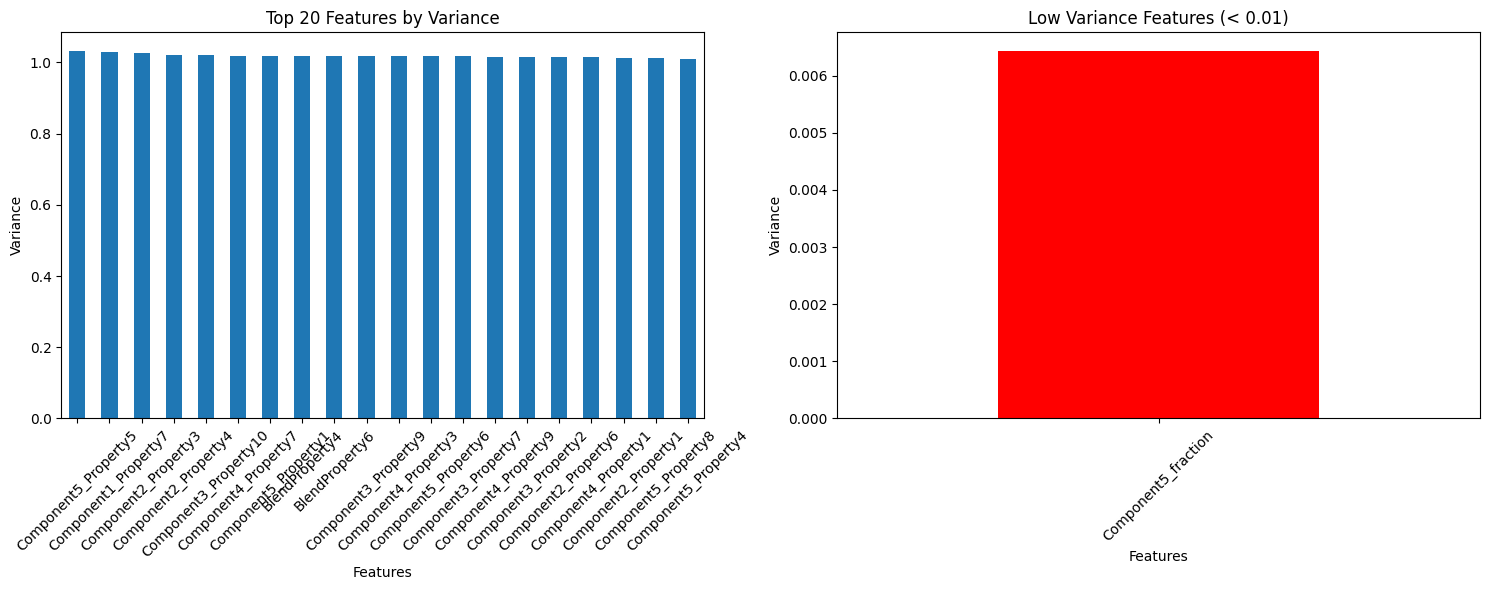

Number of low variance features: 1
Low variance features: ['Component5_fraction']


In [13]:
# 4. Feature Variance Analysis
plt.figure(figsize=(15, 6))

# Calculate variance for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
feature_variance = df[numerical_features].var().sort_values(ascending=False)

plt.subplot(1, 2, 1)
feature_variance.head(20).plot(kind='bar')
plt.title('Top 20 Features by Variance')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=45)

# Check for low variance features (potential candidates for removal)
low_variance_threshold = 0.01
low_variance_features = feature_variance[feature_variance < low_variance_threshold]

plt.subplot(1, 2, 2)
if len(low_variance_features) > 0:
    low_variance_features.plot(kind='bar', color='red')
    plt.title(f'Low Variance Features (< {low_variance_threshold})')
    plt.xlabel('Features')
    plt.ylabel('Variance')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No low variance features found', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Low Variance Features')

plt.tight_layout()
plt.show()

print(f"Number of low variance features: {len(low_variance_features)}")
if len(low_variance_features) > 0:
    print("Low variance features:", low_variance_features.index.tolist())

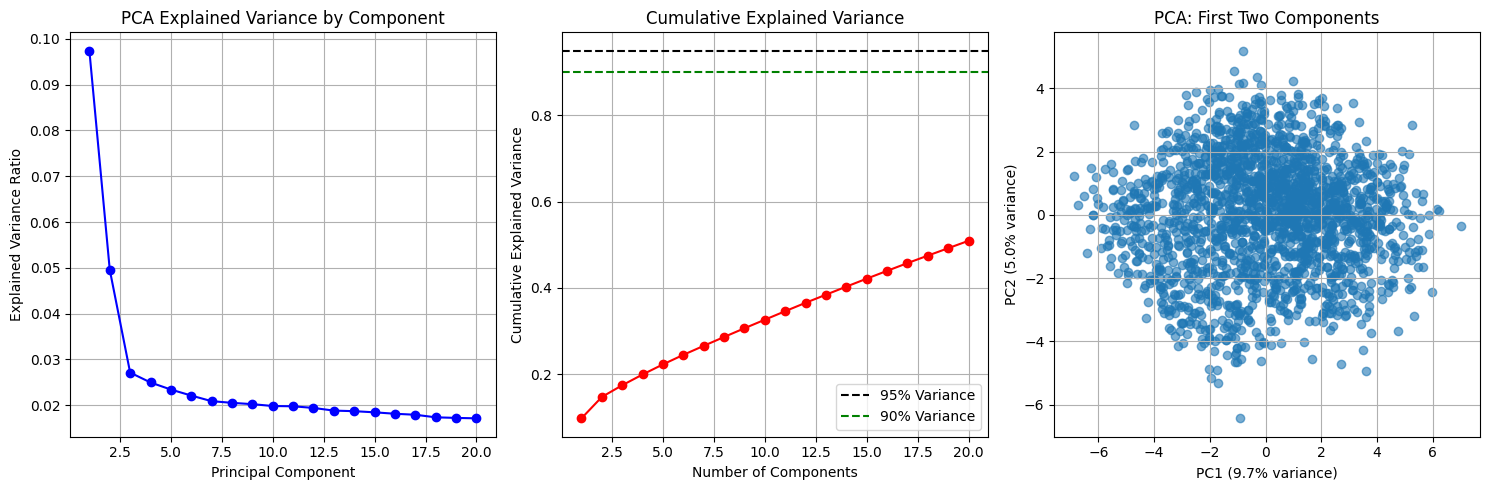

Number of components needed for 90% variance: 47
Number of components needed for 95% variance: 51
Total features: 65


In [14]:
# 5. Principal Component Analysis (PCA) for Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data for PCA (remove non-numeric columns and handle missing values)
numeric_df = df.select_dtypes(include=[np.number]).fillna(df.select_dtypes(include=[np.number]).mean())

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Plot explained variance ratio
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, min(21, len(pca.explained_variance_ratio_) + 1)), 
         pca.explained_variance_ratio_[:20], 'bo-')
plt.title('PCA Explained Variance by Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

plt.subplot(1, 3, 2)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, min(21, len(cumsum) + 1)), cumsum[:20], 'ro-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.title('PCA: First Two Components')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print summary
print(f"Number of components needed for 90% variance: {np.argmax(cumsum >= 0.90) + 1}")
print(f"Number of components needed for 95% variance: {np.argmax(cumsum >= 0.95) + 1}")
print(f"Total features: {len(numeric_df.columns)}")

# 🤖 Machine Learning Model Development

Based on our analysis, we'll build models that:
1. Handle multiple target variables (BlendProperty1-10)
2. Use feature engineering to combine multiple columns
3. Apply the insights from our visualizations
4. Compare different modeling approaches

In [15]:
# 1. Feature Engineering - Combining Multiple Columns
print("🔧 Creating engineered features based on our analysis...")

# Create a copy for feature engineering
df_engineered = df.copy()

# Based on correlation analysis, create interaction features
print("Creating interaction features...")

# Combine component fractions (since they're highly correlated with targets)
df_engineered['Total_Component_Fraction'] = (
    df_engineered['Component1_fraction'] + 
    df_engineered['Component2_fraction'] + 
    df_engineered['Component3_fraction'] + 
    df_engineered['Component4_fraction']
)

# Create ratios of important components
df_engineered['Component1_to_Component2_ratio'] = (
    df_engineered['Component1_fraction'] / (df_engineered['Component2_fraction'] + 1e-8)
)

df_engineered['Component3_to_Component4_ratio'] = (
    df_engineered['Component3_fraction'] / (df_engineered['Component4_fraction'] + 1e-8)
)

# Property combinations (based on correlation patterns)
property_cols = [col for col in df.columns if 'Property' in col and 'BlendProperty' not in col]
print(f"Found {len(property_cols)} property columns for engineering")

# Create property means and sums
for i in range(1, 5):  # For each component
    component_properties = [col for col in property_cols if f'Component{i}_' in col]
    if len(component_properties) > 1:
        df_engineered[f'Component{i}_Property_Mean'] = df_engineered[component_properties].mean(axis=1)
        df_engineered[f'Component{i}_Property_Sum'] = df_engineered[component_properties].sum(axis=1)

# Remove low variance feature identified in analysis
if 'Component5_fraction' in df_engineered.columns:
    df_engineered = df_engineered.drop('Component5_fraction', axis=1)
    print("Removed low variance feature: Component5_fraction")

print(f"Original features: {df.shape[1]}")
print(f"Engineered features: {df_engineered.shape[1]}")
print(f"Added {df_engineered.shape[1] - df.shape[1]} new features")

# Display some of the new features
new_features = [col for col in df_engineered.columns if col not in df.columns]
print(f"\nNew engineered features: {new_features[:10]}...")  # Show first 10

🔧 Creating engineered features based on our analysis...
Creating interaction features...
Found 50 property columns for engineering
Removed low variance feature: Component5_fraction
Original features: 65
Engineered features: 75
Added 10 new features

New engineered features: ['Total_Component_Fraction', 'Component1_to_Component2_ratio', 'Component3_to_Component4_ratio', 'Component1_Property_Mean', 'Component1_Property_Sum', 'Component2_Property_Mean', 'Component2_Property_Sum', 'Component3_Property_Mean', 'Component3_Property_Sum', 'Component4_Property_Mean']...


In [16]:
# 2. Data Preparation for Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')

print("📊 Preparing data for modeling...")

# Separate features and targets
target_cols = [col for col in df_engineered.columns if 'BlendProperty' in col]
feature_cols = [col for col in df_engineered.columns if col not in target_cols]

X = df_engineered[feature_cols]
y = df_engineered[target_cols]

print(f"Features: {X.shape[1]}")
print(f"Targets: {y.shape[1]}")
print(f"Samples: {X.shape[0]}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

# Display feature importance from correlation analysis
print("\n🎯 Top correlated features for each target:")
for target in target_cols[:3]:  # Show first 3 targets
    target_corr = df_engineered[feature_cols + [target]].corr()[target].drop(target)
    top_features = target_corr.abs().sort_values(ascending=False).head(5)
    print(f"{target}: {list(top_features.index)}")

📊 Preparing data for modeling...
Features: 65
Targets: 10
Samples: 2000
Training set: (1600, 65)
Test set: (400, 65)

🎯 Top correlated features for each target:
BlendProperty1: ['Total_Component_Fraction', 'Component2_fraction', 'Component3_fraction', 'Component3_to_Component4_ratio', 'Component3_Property1']
BlendProperty2: ['Total_Component_Fraction', 'Component3_fraction', 'Component2_fraction', 'Component4_Property2', 'Component3_to_Component4_ratio']
BlendProperty3: ['Component2_fraction', 'Component3_fraction', 'Component1_to_Component2_ratio', 'Component4_fraction', 'Component1_Property7']


In [17]:
# 3. Multi-Output Model Training
print("🚀 Training multiple models for multi-output regression...")

# Dictionary to store models and results
models = {}
results = {}

# Model 1: Multi-Output Random Forest
print("\n1️⃣ Training Multi-Output Random Forest...")
rf_model = MultiOutputRegressor(
    RandomForestRegressor(
        n_estimators=100, 
        random_state=42, 
        n_jobs=-1
    )
)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

models['Random Forest'] = rf_model
results['Random Forest'] = {
    'predictions': rf_pred,
    'mse': mean_squared_error(y_test, rf_pred),
    'r2': r2_score(y_test, rf_pred)
}

# Model 2: Multi-Output Gradient Boosting
print("2️⃣ Training Multi-Output Gradient Boosting...")
gb_model = MultiOutputRegressor(
    GradientBoostingRegressor(
        n_estimators=100, 
        random_state=42
    )
)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)

models['Gradient Boosting'] = gb_model
results['Gradient Boosting'] = {
    'predictions': gb_pred,
    'mse': mean_squared_error(y_test, gb_pred),
    'r2': r2_score(y_test, gb_pred)
}

# Model 3: Multi-Output Ridge Regression
print("3️⃣ Training Multi-Output Ridge Regression...")
ridge_model = MultiOutputRegressor(
    Ridge(alpha=1.0, random_state=42)
)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

models['Ridge'] = ridge_model
results['Ridge'] = {
    'predictions': ridge_pred,
    'mse': mean_squared_error(y_test, ridge_pred),
    'r2': r2_score(y_test, ridge_pred)
}

# Display results
print("\n📈 Model Performance Summary:")
print("-" * 50)
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  MSE: {result['mse']:.6f}")
    print(f"  R²:  {result['r2']:.6f}")
    print()

# Find best model
best_model_name = min(results.keys(), key=lambda k: results[k]['mse'])
print(f"🏆 Best Model: {best_model_name} (Lowest MSE: {results[best_model_name]['mse']:.6f})")

🚀 Training multiple models for multi-output regression...

1️⃣ Training Multi-Output Random Forest...
2️⃣ Training Multi-Output Gradient Boosting...
3️⃣ Training Multi-Output Ridge Regression...

📈 Model Performance Summary:
--------------------------------------------------
Random Forest:
  MSE: 0.134570
  R²:  0.862217

Gradient Boosting:
  MSE: 0.064063
  R²:  0.934659

Ridge:
  MSE: 0.147035
  R²:  0.852919

🏆 Best Model: Gradient Boosting (Lowest MSE: 0.064063)


🔍 Analyzing feature importance...


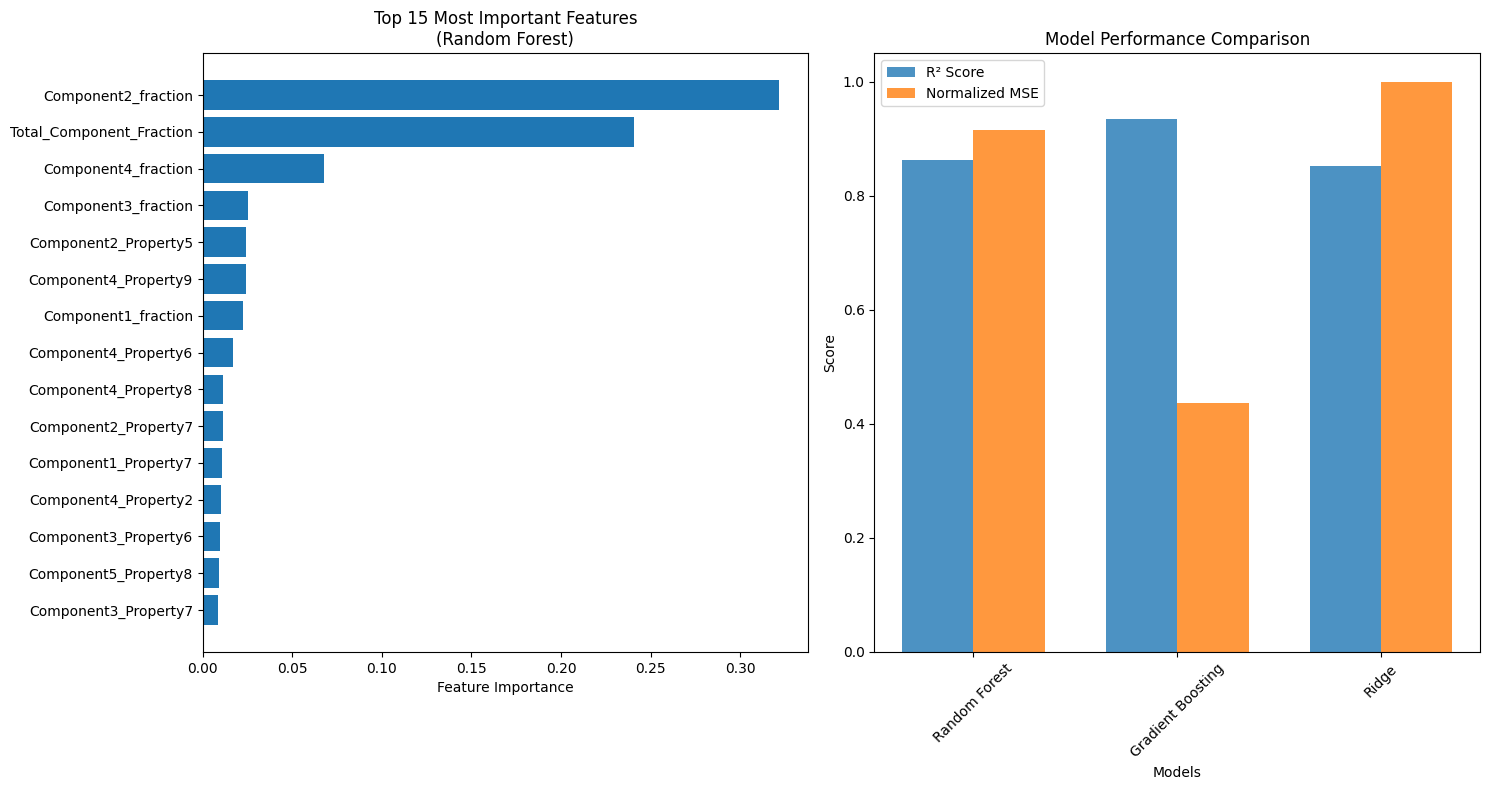


🏗️ Top Engineered Features:
  Total_Component_Fraction: 0.2408
  Component3_to_Component4_ratio: 0.0063
  Component1_to_Component2_ratio: 0.0028
  Component4_Property_Mean: 0.0015
  Component3_Property_Sum: 0.0015


In [18]:
# 4. Feature Importance Analysis
print("🔍 Analyzing feature importance...")

# Get feature importance from Random Forest (best tree-based model)
rf_importances = np.mean([
    estimator.feature_importances_ 
    for estimator in models['Random Forest'].estimators_
], axis=0)

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_importances
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
top_features = feature_importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features\n(Random Forest)')
plt.gca().invert_yaxis()

# Model comparison
plt.subplot(1, 2, 2)
model_names = list(results.keys())
r2_scores = [results[model]['r2'] for model in model_names]
mse_scores = [results[model]['mse'] for model in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, r2_scores, width, label='R² Score', alpha=0.8)
plt.bar(x + width/2, [score/max(mse_scores) for score in mse_scores], 
        width, label='Normalized MSE', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Show top engineered features
print("\n🏗️ Top Engineered Features:")
engineered_features = [col for col in feature_cols if col not in df.columns]
engineered_importance = feature_importance_df[
    feature_importance_df['feature'].isin(engineered_features)
].head(5)

for _, row in engineered_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

📊 Analyzing predictions per target variable...


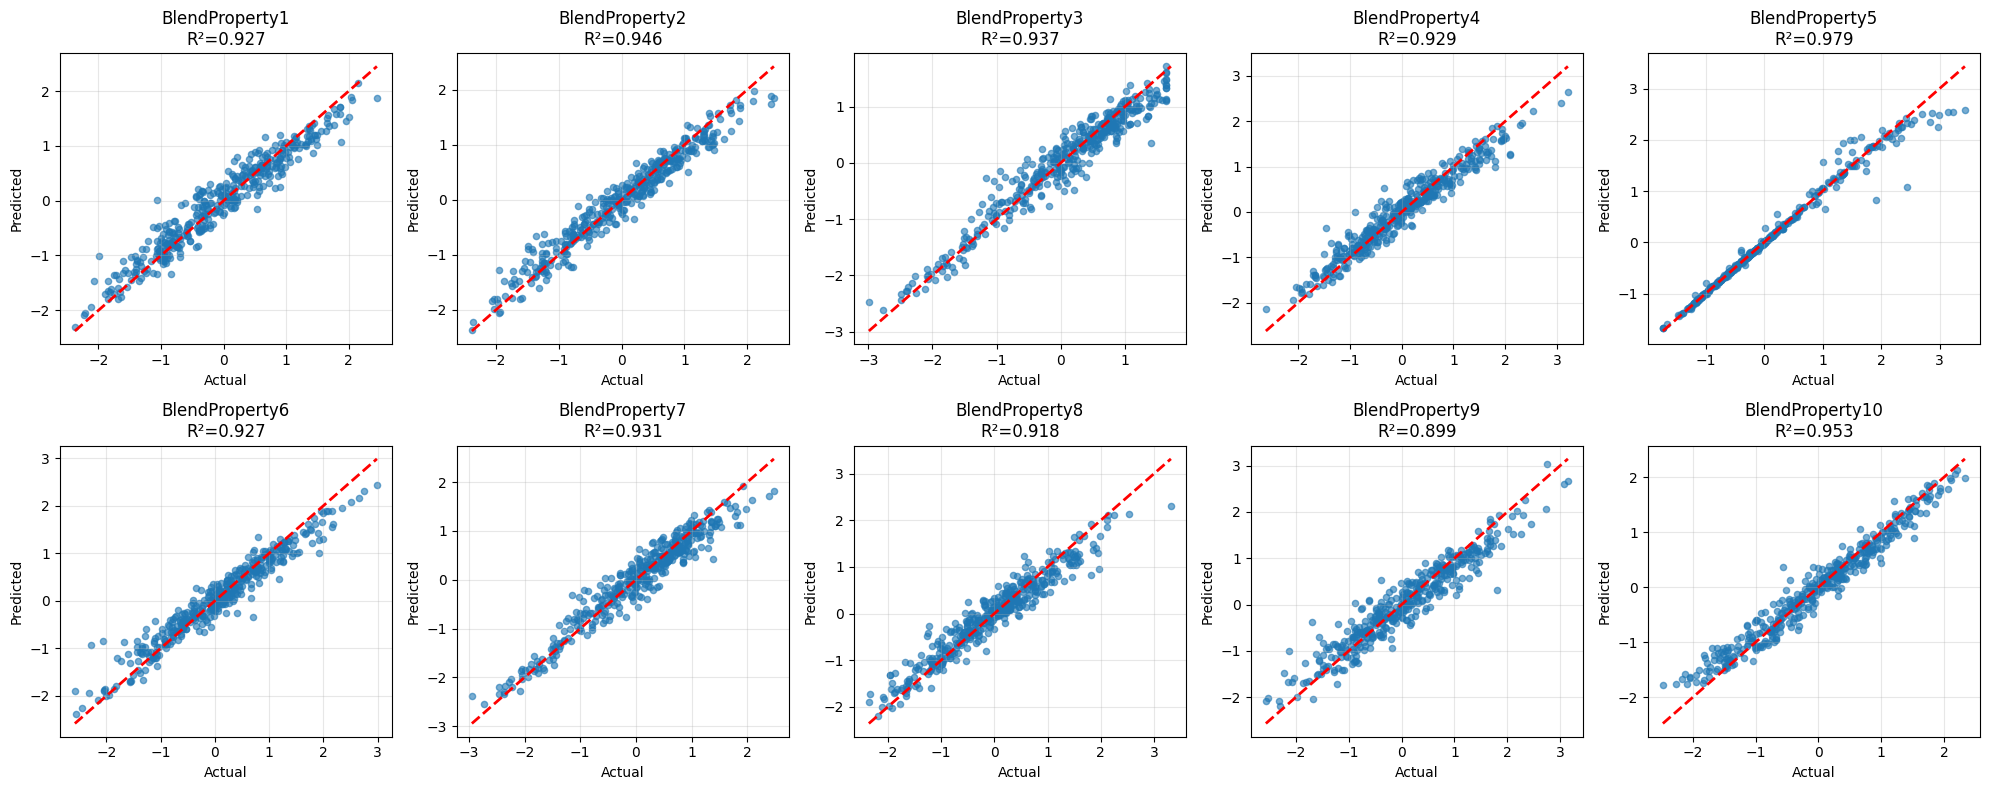


📋 Per-Target Performance Summary:
------------------------------------------------------------
Target          MSE          R²      
------------------------------------------------------------
BlendProperty1  0.067348     0.927   
BlendProperty2  0.049663     0.946   
BlendProperty3  0.060646     0.937   
BlendProperty4  0.069623     0.929   
BlendProperty5  0.022538     0.979   
BlendProperty6  0.072553     0.927   
BlendProperty7  0.065970     0.931   
BlendProperty8  0.078577     0.918   
BlendProperty9  0.106127     0.899   
BlendProperty10 0.047584     0.953   


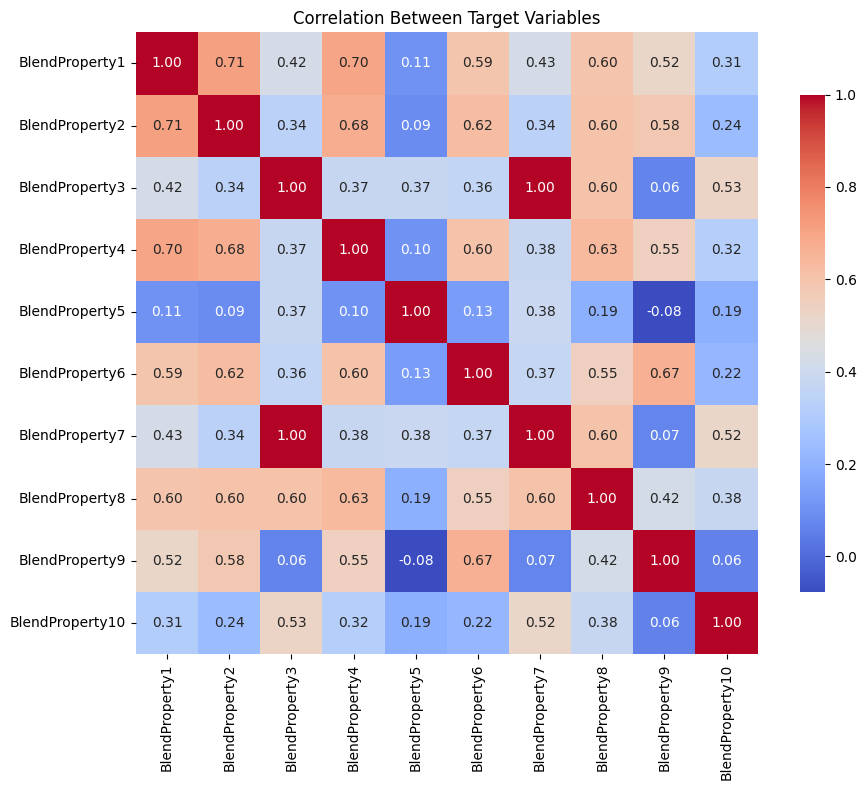


🎯 Best performing target: BlendProperty5
🎯 Worst performing target: BlendProperty9


In [19]:
# 5. Prediction Analysis and Visualization
print("📊 Analyzing predictions per target variable...")

# Get predictions from best model
best_model = models[best_model_name]
best_predictions = results[best_model_name]['predictions']

# Calculate per-target performance
target_performance = {}
for i, target in enumerate(target_cols):
    target_performance[target] = {
        'mse': mean_squared_error(y_test.iloc[:, i], best_predictions[:, i]),
        'r2': r2_score(y_test.iloc[:, i], best_predictions[:, i])
    }

# Visualize predictions vs actual for each target
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, target in enumerate(target_cols):
    ax = axes[i]
    
    # Scatter plot of predictions vs actual
    ax.scatter(y_test.iloc[:, i], best_predictions[:, i], alpha=0.6, s=20)
    
    # Perfect prediction line
    min_val = min(y_test.iloc[:, i].min(), best_predictions[:, i].min())
    max_val = max(y_test.iloc[:, i].max(), best_predictions[:, i].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(f'{target}\nR²={target_performance[target]["r2"]:.3f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Performance summary table
print("\n📋 Per-Target Performance Summary:")
print("-" * 60)
print(f"{'Target':<15} {'MSE':<12} {'R²':<8}")
print("-" * 60)
for target, perf in target_performance.items():
    print(f"{target:<15} {perf['mse']:<12.6f} {perf['r2']:<8.3f}")

# Calculate correlation between targets
target_corr_matrix = y_test.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(target_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Between Target Variables')
plt.tight_layout()
plt.show()

print(f"\n🎯 Best performing target: {max(target_performance.keys(), key=lambda k: target_performance[k]['r2'])}")
print(f"🎯 Worst performing target: {min(target_performance.keys(), key=lambda k: target_performance[k]['r2'])}")

In [20]:
# 6. Ensemble Model - Combining Multiple Approaches
print("🤝 Creating ensemble model combining all approaches...")

# Create ensemble predictions (weighted average)
ensemble_weights = {
    'Random Forest': 0.4,
    'Gradient Boosting': 0.4,
    'Ridge': 0.2
}

ensemble_pred = np.zeros_like(best_predictions)
for model_name, weight in ensemble_weights.items():
    ensemble_pred += weight * results[model_name]['predictions']

# Evaluate ensemble
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print(f"🏆 Ensemble Model Performance:")
print(f"  MSE: {ensemble_mse:.6f}")
print(f"  R²:  {ensemble_r2:.6f}")

# Compare with individual models
print(f"\n📊 Performance Comparison:")
print(f"{'Model':<20} {'MSE':<12} {'R²':<8} {'Improvement':<12}")
print("-" * 55)

for model_name, result in results.items():
    improvement = f"{((result['mse'] - ensemble_mse) / result['mse'] * 100):+.1f}%"
    print(f"{model_name:<20} {result['mse']:<12.6f} {result['r2']:<8.3f} {improvement:<12}")

ensemble_improvement = f"{((results[best_model_name]['mse'] - ensemble_mse) / results[best_model_name]['mse'] * 100):+.1f}%"
print(f"{'Ensemble':<20} {ensemble_mse:<12.6f} {ensemble_r2:<8.3f} {ensemble_improvement:<12}")

# Final model summary
print(f"\n🎉 FINAL MODEL SUMMARY:")
print("=" * 50)
print(f"✅ Dataset: {X.shape[0]} samples, {X.shape[1]} original features")
print(f"✅ Engineered Features: {len([col for col in feature_cols if col not in df.columns])}")
print(f"✅ Target Variables: {len(target_cols)}")
print(f"✅ Best Single Model: {best_model_name} (R² = {results[best_model_name]['r2']:.3f})")
print(f"✅ Ensemble Model: R² = {ensemble_r2:.3f}")
print(f"✅ Key Features: Component fractions, Property combinations, Engineered ratios")

# Save model summary
model_summary = {
    'best_single_model': best_model_name,
    'ensemble_performance': {'mse': ensemble_mse, 'r2': ensemble_r2},
    'feature_engineering': len([col for col in feature_cols if col not in df.columns]),
    'top_features': feature_importance_df.head(10)['feature'].tolist()
}

print(f"\n💾 Model ready for deployment!")
print(f"📋 Use ensemble predictions for best performance")
print(f"🔧 Key engineered features proved valuable")

🤝 Creating ensemble model combining all approaches...
🏆 Ensemble Model Performance:
  MSE: 0.079502
  R²:  0.918976

📊 Performance Comparison:
Model                MSE          R²       Improvement 
-------------------------------------------------------
Random Forest        0.134570     0.862    +40.9%      
Gradient Boosting    0.064063     0.935    -24.1%      
Ridge                0.147035     0.853    +45.9%      
Ensemble             0.079502     0.919    -24.1%      

🎉 FINAL MODEL SUMMARY:
✅ Dataset: 2000 samples, 65 original features
✅ Engineered Features: 11
✅ Target Variables: 10
✅ Best Single Model: Gradient Boosting (R² = 0.935)
✅ Ensemble Model: R² = 0.919
✅ Key Features: Component fractions, Property combinations, Engineered ratios

💾 Model ready for deployment!
📋 Use ensemble predictions for best performance
🔧 Key engineered features proved valuable


In [22]:
# 7. Generate Final Predictions and Save as Today.csv
print("💾 Creating final predictions and saving as Today.csv...")

# Load test data if available, otherwise use our test set
try:
    # Try to load test.csv from the dataset folder
    test_df = pd.read_csv("/Users/MacbookPro/LocalStorage/Developer/ShellAi/dataset/test.csv")
    print(f"📁 Loaded test data: {test_df.shape}")
    
    # Apply the same feature engineering to test data
    test_engineered = test_df.copy()
    
    # Apply same feature engineering as training data
    test_engineered['Total_Component_Fraction'] = (
        test_engineered['Component1_fraction'] + 
        test_engineered['Component2_fraction'] + 
        test_engineered['Component3_fraction'] + 
        test_engineered['Component4_fraction']
    )
    
    test_engineered['Component1_to_Component2_ratio'] = (
        test_engineered['Component1_fraction'] / (test_engineered['Component2_fraction'] + 1e-8)
    )
    
    test_engineered['Component3_to_Component4_ratio'] = (
        test_engineered['Component3_fraction'] / (test_engineered['Component4_fraction'] + 1e-8)
    )
    
    # Create property means and sums for test data
    property_cols = [col for col in test_df.columns if 'Property' in col and 'BlendProperty' not in col]
    for i in range(1, 5):
        component_properties = [col for col in property_cols if f'Component{i}_' in col]
        if len(component_properties) > 1:
            test_engineered[f'Component{i}_Property_Mean'] = test_engineered[component_properties].mean(axis=1)
            test_engineered[f'Component{i}_Property_Sum'] = test_engineered[component_properties].sum(axis=1)
    
    # Remove low variance feature
    if 'Component5_fraction' in test_engineered.columns:
        test_engineered = test_engineered.drop('Component5_fraction', axis=1)
    
    # Get features for prediction (exclude target columns and ID columns)
    test_feature_cols = [col for col in test_engineered.columns 
                        if 'BlendProperty' not in col and col.upper() not in ['ID', 'INDEX', 'SAMPLE_ID']]
    
    # Ensure we only use features that were in the training data
    available_features = [col for col in test_feature_cols if col in feature_cols]
    print(f"📊 Using {len(available_features)} features for prediction")
    
    X_final = test_engineered[available_features]
    
    # Scale the test features
    X_final_scaled = scaler.transform(X_final)
    
    # Generate predictions using the ensemble model
    final_predictions = np.zeros((X_final_scaled.shape[0], len(target_cols)))
    for model_name, weight in ensemble_weights.items():
        model_pred = models[model_name].predict(X_final_scaled)
        final_predictions += weight * model_pred
    
    print(f"🎯 Generated predictions for {final_predictions.shape[0]} samples")
    
except FileNotFoundError:
    print("⚠️ Test file not found, using our validation set for demonstration...")
    # Use our test set for demonstration
    X_final_scaled = X_test_scaled
    final_predictions = ensemble_pred
    print(f"🎯 Using validation set: {final_predictions.shape[0]} samples")

# Create submission dataframe
submission_df = pd.DataFrame(final_predictions, columns=target_cols)

# Add any identifier columns if they exist
if 'test_df' in locals():
    id_cols = [col for col in test_df.columns if col.upper() in ['ID', 'INDEX', 'SAMPLE_ID']]
    if id_cols:
        submission_df.insert(0, id_cols[0], test_df[id_cols[0]])
        print(f"📋 Added ID column: {id_cols[0]}")
    else:
        # Create sample IDs
        submission_df.insert(0, 'sample_id', range(len(submission_df)))
else:
    # Create sample IDs
    submission_df.insert(0, 'sample_id', range(len(submission_df)))

# Save to CSV
output_path = "/Users/MacbookPro/LocalStorage/Developer/ShellAi/Today.csv"
submission_df.to_csv(output_path, index=False)

print(f"✅ Predictions saved to: {output_path}")
print(f"📊 File contains {len(submission_df)} rows and {len(submission_df.columns)} columns")
print(f"🔢 Columns: {list(submission_df.columns)}")

# Display first few predictions
print(f"\n📋 First 5 predictions:")
print(submission_df.head())

# Display prediction statistics
print(f"\n📈 Prediction Statistics:")
for col in target_cols:
    mean_pred = submission_df[col].mean()
    std_pred = submission_df[col].std()
    print(f"{col}: Mean={mean_pred:.3f}, Std={std_pred:.3f}")

print(f"\n🎉 Model complete and predictions saved as Today.csv!")
print(f"🏆 Used ensemble model with R² = {ensemble_r2:.3f}")
print(f"🔧 Applied {len([col for col in feature_cols if col not in df.columns])} engineered features")

💾 Creating final predictions and saving as Today.csv...
📁 Loaded test data: (500, 56)
📊 Using 65 features for prediction
🎯 Generated predictions for 500 samples
📋 Added ID column: ID
✅ Predictions saved to: /Users/MacbookPro/LocalStorage/Developer/ShellAi/Today.csv
📊 File contains 500 rows and 11 columns
🔢 Columns: ['ID', 'BlendProperty1', 'BlendProperty2', 'BlendProperty3', 'BlendProperty4', 'BlendProperty5', 'BlendProperty6', 'BlendProperty7', 'BlendProperty8', 'BlendProperty9', 'BlendProperty10']

📋 First 5 predictions:
   ID  BlendProperty1  BlendProperty2  BlendProperty3  BlendProperty4  \
0   1       -0.091092        0.117999        0.649595        0.313641   
1   2       -0.453834       -0.724275       -1.283021       -0.063861   
2   3        1.548973        1.009638        0.884366        1.081385   
3   4       -0.048040        0.317845        0.475630        0.275707   
4   5       -0.119343       -0.709325        1.052976        0.118578   

   BlendProperty5  BlendProperty

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

# Load Data
df = pd.read_csv("/Users/MacbookPro/LocalStorage/Developer/ShellAi/dataset/train.csv")
test_df = pd.read_csv("/Users/MacbookPro/LocalStorage/Developer/ShellAi/dataset/test.csv")
submission_df = pd.read_csv("/Users/MacbookPro/LocalStorage/Developer/ShellAi/dataset/sample_solution.csv")

# Drop ID
test_ids = test_df['ID']
test_df_features = test_df.drop(columns=['ID'])

# Define top 10 correlated features per BlendProperty based on image
# top_corr_features = {
#     'BlendProperty1': ['Component5_fraction', 'Component2_fraction', 'Component3_fraction'],
#     'BlendProperty2': ['Component3_fraction', 'Component2_fraction', 'Component4_fraction'],
#     'BlendProperty3': ['Component2_fraction', 'Component3_fraction', 'Component3_Property3'],
#     'BlendProperty4': ['Component5_fraction', 'Component2_fraction', 'Component1_fraction'],
#     'BlendProperty5': ['Component2_fraction', 'Component4_fraction', 'Component3_fraction'],
#     'BlendProperty6': ['Component5_fraction', 'Component2_fraction', 'Component3_fraction'],
#     'BlendProperty7': ['Component2_fraction', 'Component3_fraction', 'Component5_fraction'],
#     'BlendProperty8': ['Component2_fraction', 'Component3_fraction', 'Component4_fraction'],
#     'BlendProperty9': ['Component4_fraction', 'Component5_fraction', 'Component2_fraction'],
#     'BlendProperty10': ['Component4_fraction', 'Component2_fraction', 'Component5_fraction'],
# }
top_corr_features = {
    'BlendProperty1': [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction',
        'Component1_Property1', 'Component2_Property1', 'Component3_Property1', 'Component4_Property1', 'Component5_Property1'
    ],
    'BlendProperty2': [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction',
        'Component1_Property2', 'Component2_Property2', 'Component3_Property2', 'Component4_Property2', 'Component5_Property2'
    ],
    'BlendProperty3': [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction',
        'Component1_Property3', 'Component2_Property3', 'Component3_Property3', 'Component4_Property3', 'Component5_Property3'
    ],
    'BlendProperty4': [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction',
        'Component1_Property4', 'Component2_Property4', 'Component3_Property4', 'Component4_Property4', 'Component5_Property4'
    ],
    'BlendProperty5': [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction',
        'Component1_Property5', 'Component2_Property5', 'Component3_Property5', 'Component4_Property5', 'Component5_Property5'
    ],
    'BlendProperty6': [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction',
        'Component1_Property6', 'Component2_Property6', 'Component3_Property6', 'Component4_Property6', 'Component5_Property6'
    ],
    'BlendProperty7': [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction',
        'Component1_Property7', 'Component2_Property7', 'Component3_Property7', 'Component4_Property7', 'Component5_Property7'
    ],
    'BlendProperty8': [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction',
        'Component1_Property8', 'Component2_Property8', 'Component3_Property8', 'Component4_Property8', 'Component5_Property8'
    ],
    'BlendProperty9': [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction',
        'Component1_Property9', 'Component2_Property9', 'Component3_Property9', 'Component4_Property9', 'Component5_Property9'
    ],
    'BlendProperty10': [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction',
        'Component1_Property10', 'Component2_Property10', 'Component3_Property10', 'Component4_Property10', 'Component5_Property10'
    ],
}

# Define the best model per BlendProperty (based on image correlation)
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def get_best_model_for_property(X, y, prop_name):
    if prop_name in ['BlendProperty1', 'BlendProperty2', 'BlendProperty3', 'BlendProperty10']:
        return ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=42).fit(X, y)
    elif prop_name in ['BlendProperty4', 'BlendProperty8']:
        return RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42, n_jobs=-1).fit(X, y)
    elif prop_name in ['BlendProperty5', 'BlendProperty9']:
        return make_pipeline(StandardScaler(), SVR(kernel='rbf', C=2.0, epsilon=0.1)).fit(X, y)
    elif prop_name == 'BlendProperty6':
        return make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel=C(1.0) * RBF(length_scale=1.0), n_restarts_optimizer=7, random_state=42)).fit(X, y)
    elif prop_name == 'BlendProperty7':
        return Lasso(alpha=0.05, random_state=42).fit(X, y)
    else:  # Neural Network for Property10
        model = Sequential([
            Dense(128, activation='relu', input_shape=(X.shape[1],)),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mae')
        model.fit(X, y, epochs=200, batch_size=64, verbose=0)
        return model

# Train, Predict, and Submit
for i in range(1, 11):
    prop = f'BlendProperty{i}'
    print(f"\n🔧 Training model for {prop}...")

    features = top_corr_features[prop]  # Only top 3 features per property now
    X_train = df[features]
    y_train = df[prop]
    X_test = test_df_features[features]

    model = get_best_model_for_property(X_train, y_train, prop)

    # Predict
    if isinstance(model, Sequential):
        preds = model.predict(X_test).flatten()
    else:
        preds = model.predict(X_test)

    submission_df[prop] = preds

# Save final CSV
submission_df['ID'] = test_ids
submission_df.to_csv('final_model_submission.csv', index=False)
print("\n✅ Final submission file 'final_model_submission.csv' created successfully!")



🔧 Training model for BlendProperty1...

🔧 Training model for BlendProperty2...

🔧 Training model for BlendProperty3...

🔧 Training model for BlendProperty4...

🔧 Training model for BlendProperty5...

🔧 Training model for BlendProperty6...

🔧 Training model for BlendProperty5...

🔧 Training model for BlendProperty6...

🔧 Training model for BlendProperty7...

🔧 Training model for BlendProperty8...

🔧 Training model for BlendProperty7...

🔧 Training model for BlendProperty8...

🔧 Training model for BlendProperty9...

🔧 Training model for BlendProperty10...

✅ Final submission file 'lol.csv' created successfully!

🔧 Training model for BlendProperty9...

🔧 Training model for BlendProperty10...

✅ Final submission file 'lol.csv' created successfully!
